# ML para predecir el gesto

Creación y evaluación de modelos de Machine Learning para predecir qué gesto está realizando el paciente

In [30]:
# ---------- importar librerías---------
import pandas as pd
# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_theme(style="darkgrid")
# scikit-learn (ML en python)
## Procesar el dataset
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
## Modelos ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
## Evaluación de los modelos
from sklearn.metrics import *
# Para ignorar los FutureWarning
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [31]:
#---------Importar los datos-----------
# Dataframe medidas calculadas por repetición
df = pd.read_csv('../csvFiles/medidasPerRepetition.csv', dtype=object) # salida de leer_dataset.ipynb
df.head() # visualizacion de la cabecera

,SubjectID,GestureLabel,RepetitionNumber,CorrectLabel,Position,ArmsTogetherAngle_standardDeviation,ArmsTogetherAngle_Maximum,ArmsTogetherAngle_Minimum,ArmsTogetherAngle_Mean,ArmsTogetherAngle_Median,...,WristAngleRight_standardDeviation,WristAngleRight_Maximum,WristAngleRight_Minimum,WristAngleRight_Mean,WristAngleRight_Median,KneeAngleRight_standardDeviation,KneeAngleRight_Maximum,KneeAngleRight_Minimum,KneeAngleRight_Mean,KneeAngleRight_Median
0,101,0,1,1,stand,10.670341993092354,48.059652761639576,0.0048807662354137,21.234671517209446,22.83289147945006,...,27.747671544455784,179.99004458952922,1.895342254750395,158.3796393196956,167.5754479867348,33.21825901846228,179.96934757003004,23.627158746328853,152.77402908958072,168.526653468215
1,102,0,10,1,chair,12.916413412177558,165.07646943448404,1.289325958760638,23.98376953134508,22.54033601481008,...,31.99572402744675,179.93282577999278,0.3364676201884472,157.58054518853646,169.24449943332698,48.365156564099046,179.92348822231432,0.1283422443610501,141.18107432174696,173.60922079773533
2,102,0,11,1,chair,7.013930067617385,49.24618070566771,0.1209929594195576,21.95525314293939,22.401926795979254,...,33.27563948143619,179.98243741516615,0.1774984781081361,156.6778786388648,169.34187787891832,50.52797943663096,179.95026227783754,0.0635814082810828,142.12820195704057,174.23312184258162
3,102,0,12,1,chair,5.000322644745113,33.28243506266367,1.897672146230762,20.78844720302887,21.778025232022262,...,38.65090118051891,179.9385717238046,0.8063643067463825,151.63843805754541,167.54069579313867,53.012206560302246,179.97589943679105,0.0102929998186067,147.72526433711266,175.24697173885224
4,201,0,13,2,wheelchair,9.603500790057916,39.12405897390368,0.5542027645228198,13.140236375900592,9.921171176844595,...,38.45315891548698,179.98166657027105,4.256657550066159,152.5031049688768,170.6214059295001,83.00999004563369,179.75752719635332,0.0516894372294613,120.57424546783201,178.20503193476813


Text(0.5, 1.0, 'Distribución de los pacientes por gesto')

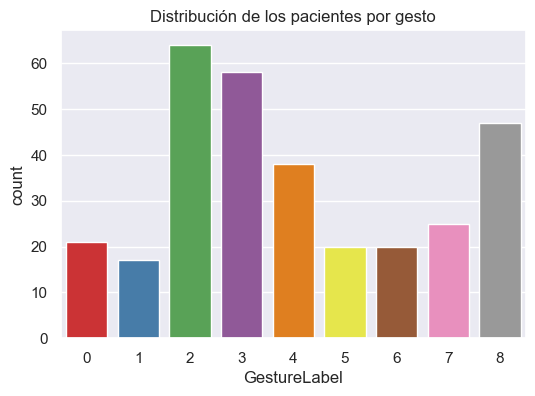

In [32]:
#---------Distribución de las clases--------
plt.figure(figsize=(6,4))
sns.countplot(x="GestureLabel", data=df, palette = "Set1")
plt.title("Distribución de los pacientes por gesto")


## 1. Preprocesado

### 1.1 Codificar variables

In [33]:
# ------Preparar el dataset-------
encoder = OrdinalEncoder(categories=[list(set(df["Position"].values))])
encoder.fit(df[["Position"]])
df["Position"] = encoder.transform(df[["Position"]])

### 1.2 Dividir el dataset

In [34]:
# Dividiemos en train y test
df_train, df_test = train_test_split(df, test_size = 0.3)

# Dividimos el conjunto de train en varibales independientes y en target
train_X = df_train.drop(['GestureLabel'], axis = 1)
train_y = pd.DataFrame(df_train['GestureLabel'])

# Dividimos el conjunto de test
test_X = df_test.drop(['GestureLabel'], axis = 1)
test_y = pd.DataFrame(df_test['GestureLabel'])

## 2. Modelos de ML
Se ha creado una función para entrenar y evaluar los modelos

In [35]:
#-------Funcion para entrenar los modelos-----------
def aplicar_modelos(modelos, X:pd.DataFrame, y:pd.DataFrame, tX:pd.DataFrame, ty:pd.DataFrame):
   """
   Aplica una lista de modelos de aprendizaje automático a los datos de prueba y muestra
   los informes de evaluación.

   Parámetros:
   modelos (list): Lista de modelos de aprendizaje automático a evaluar.
   * X: datos de entrenamiento.
   * y: target de entrenamiento.
   * tX: datos de prueba.
   * ty: target de prueba.
   """
   # Convertimos los df de target a 1-d
   y = y.values.ravel()
   ty = ty.values.ravel()

   # Iteramos sobre los modelos
   for modelo in modelos:
      modelo.fit(X,y) # entrenamos el modelo
      prediction = modelo.predict(tX) #  predicciones en los datos de prueba
      report = classification_report(ty, prediction, zero_division=0) # informe de evaluación
      print(f"\nModelo: {modelo.__class__.__name__}") 
      print(report) 

In [36]:
# creación de los modelos
knn = KNeighborsClassifier(n_neighbors=1) # K-Neighbors classifier
dtree = DecisionTreeClassifier() # Decision tree
nb = GaussianNB() # Naive Bayes
svm = SVC() # Suport Vector Machine
rf = RandomForestClassifier(n_estimators = 5)  # Random Forest
lr = LogisticRegression(max_iter = 1000)

models = [knn, dtree, nb, svm, rf, lr]

# entrenamiento + evaluación
aplicar_modelos(models, train_X, train_y, test_X, test_y)




Modelo: KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.75      0.86         8
           2       0.89      1.00      0.94        17
           3       0.94      1.00      0.97        15
           4       0.86      1.00      0.92        12
           5       1.00      0.67      0.80         6
           6       1.00      0.88      0.93         8
           7       0.71      0.62      0.67         8
           8       0.80      0.86      0.83        14

    accuracy                           0.89        93
   macro avg       0.91      0.86      0.88        93
weighted avg       0.90      0.89      0.89        93


Modelo: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.62      0.77         8
           2       0.94      1.00      0.97        17
           3    

* Confusion matrix: cuanto más valores en la diagonal mejor
* Precision: cuanto más alta mejor
* Recall: cuanto más alta mejor
* F1-measure o F-score: cuanto más alta mejor
* Accuracy: cuanto más alta mejor

En la mayoría de ejecutiones los mejores son **DecisionTreeClassifier** o **KNeighborsClassifier**

In [66]:

def plot_confusion_matrix(modelo, tX, ty):
    """
    Grafica la matriz de confusión para un modelo dado.

    Parámetros:
    * modelo: El modelo de clasificación entrenado.
    * tX: Los datos de prueba.
    * ty: Los valores reales del target para los datos de prueba.
    """
    prediction = modelo.predict(tX)
    cm = confusion_matrix(ty, prediction)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.title('Confusion Matrix ' + modelo.__class__.__name__)
    plt.show()


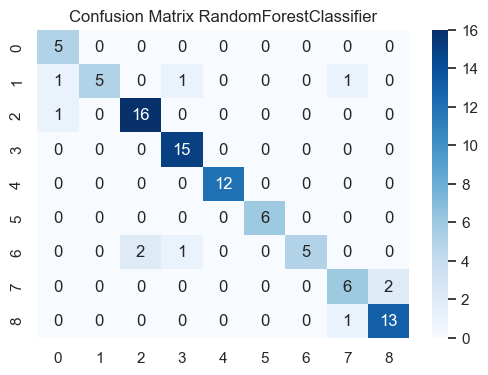

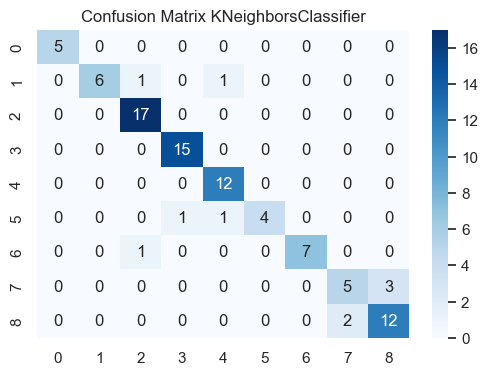

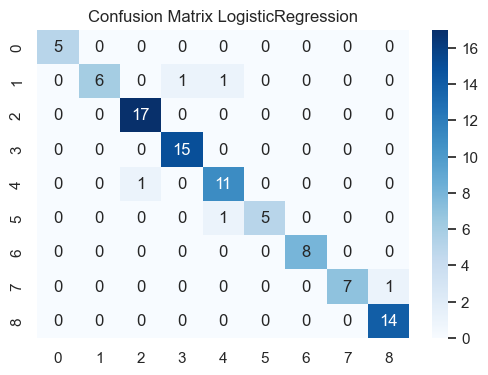

In [68]:
# Crear una figura y ejes para las tres gráficas
plot_confusion_matrix(rf, test_X, test_y)
plot_confusion_matrix(knn, test_X, test_y)
plot_confusion_matrix(lr, test_X, test_y)



**DataFrame con la prediccion del mejor modelo**

In [39]:
df_X = df.drop(['GestureLabel'], axis = 1)
df['Prediction'] = knn.predict(df_X)

In [40]:
# Insertar las nuevas columnas en las posiciones deseadas
df.insert(2, 'Prediction', df.pop('Prediction')) 

# Ordenar el DataFrame
df['RepetitionNumber'] = df['RepetitionNumber'].astype(int)
df_sorted = df.sort_values(by=['SubjectID', 'GestureLabel', 'RepetitionNumber'])

# Ajustar la configuración de pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar todas las filas del DataFrame
df_sorted 

,SubjectID,GestureLabel,Prediction,RepetitionNumber,CorrectLabel,Position,ArmsTogetherAngle_standardDeviation,ArmsTogetherAngle_Maximum,ArmsTogetherAngle_Minimum,ArmsTogetherAngle_Mean,...,WristAngleRight_standardDeviation,WristAngleRight_Maximum,WristAngleRight_Minimum,WristAngleRight_Mean,WristAngleRight_Median,KneeAngleRight_standardDeviation,KneeAngleRight_Maximum,KneeAngleRight_Minimum,KneeAngleRight_Mean,KneeAngleRight_Median
0,101,0,0,1,1,1.0,10.670341993092354,48.059652761639576,0.0048807662354137,21.234671517209446,...,27.747671544455784,179.99004458952922,1.895342254750395,158.3796393196956,167.5754479867348,33.21825901846228,179.96934757003004,23.627158746328853,152.77402908958072,168.526653468215
11,101,0,0,2,1,1.0,10.643798494902493,128.27995817458168,0.132866105827386,23.254002014021435,...,29.55226516829674,179.9908582532832,4.948156604879883,160.39313484075,170.20302141204812,30.518190395916786,179.9391214925092,24.396858559506576,156.30437944301832,170.33964427751064
14,101,0,0,3,1,1.0,8.876174569230198,108.39757829998308,0.3847164410748558,23.90839410074957,...,43.113789850798945,179.9991794141775,0.1040400332745957,152.43243750533765,170.24836685367706,28.580895255511795,179.99591241209714,76.55939505004818,155.9646692131871,170.96049245343042
15,101,0,0,4,1,1.0,9.267800155617858,47.303957825959245,0.1599790181262952,25.644813823072862,...,39.11442554185975,179.96273854173143,0.4428810680889743,154.57177479510608,170.2502369185301,28.10857563477267,179.7584460588287,78.31420651763231,154.82124248823558,167.24208318646993
16,101,0,0,5,1,1.0,13.423791516882075,127.0860321459336,6.185177962667503,28.980801215737117,...,35.88499527273334,179.9872427314901,0.5487513587619516,153.56509157523627,167.27028086221824,36.85233994627112,179.97380772665605,0.0896396503360735,148.90153047858107,164.2063012479211
17,101,0,0,6,1,2.0,10.404602075056452,85.62558731039977,0.5992423668122835,27.507617448583748,...,35.48149066191785,179.97463645411975,0.2295860520209514,153.34717764207144,166.75613200985057,40.02825043498841,179.97196568287927,0.0159447652993083,142.61075898877613,162.77513517429279
18,101,0,0,7,1,2.0,20.023370823923216,120.11455193843128,5.984309090546892,30.76805487792402,...,40.28055621912211,179.9961582131242,0.064617186984538,154.67459207200125,170.28508118532258,32.97390929890298,179.98063200841435,61.08544383084846,142.69113585224648,143.75322502735688
19,101,0,0,8,1,2.0,20.556565786431634,135.3533652429652,6.495598614031959,28.874027337407632,...,34.17056388815109,179.9466232473407,2.6429596395227137,155.04340003411414,168.4293481918574,31.37566964949709,179.98457378038583,62.438616276109954,147.10408861919996,149.48900640038747
20,101,0,0,9,1,1.0,7.178512213745079,56.88467314999607,5.656746032737259,24.17737210482445,...,35.20770752073116,179.99012700795404,1.989148821614587,152.48639521974522,166.0697535692401,53.534755851787416,179.86696686154326,0.0208255766604192,129.81474329445288,165.146629125174
21,101,1,1,1,1,1.0,26.824243451817306,133.23675535593244,16.83333953264634,55.89269774394679,...,19.10841132462925,179.98515258128683,22.80298494481049,158.93106822828068,163.93637061338237,34.80447266100845,179.91235132957672,2.5471509911365717,149.74106244998117,164.0257392649439
